In [1]:
# first we do our standard imports
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython.display import Latex
# we read in the data; this requires some minor pre-correcting of repeat value-labels in the GSS using Stata
# there may be a way to do this in Python, which would be ideal, but I'll figure that out later
df = pd.read_stata("/Users/gjmb/Desktop/Python/data/gss2018python.dta")

# Let's also set Jupyter up so that all results from each shell are printed 
from IPython.core.interactiveshell import InteractiveShell # see here https://archive.ph/QJFOK
InteractiveShell.ast_node_interactivity = "all"

# We'll also drop rows that are missing father's education or respondent's
df = df.dropna(subset=["paeduc", "educ"])
# and check our work: it should be well below 2000 since many people are missing father's education
print("shape of cleaned data NxK =", df.shape)

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


shape of cleaned data NxK = (1687, 1065)


In [2]:
# Now we need to make our mesh. We basically want to produce a 21x21 array on with all possible
    # unique combinations of the values of our variables for each variable. One will be the 
    # transpose of the other, so if we imagine stacking them atop one another, or if they were
    # literally an xy cartesian plane, they would hit all possible values of the two variables. 
    
# First, we just make a list of possible values for each variable. 
x = np.arange(0, 21)
print("possible values for father's education=", x)
y = np.arange(0, 21)
print("possible values for r's education=", y)

# Now we basically make each one a 21x21 grid. 
xs, ys = np.meshgrid(x, y)
print("the NumPy array view of our grid for father's ed")
print(xs)
print("the NumPy array view of our grid for r's ed")
print(ys)


possible values for father's education= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
possible values for r's education= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
the NumPy array view of our grid for father's ed
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
 [ 0  1  2  3  4  5 

In [3]:
# Now we need to make our cut points. Somewhat annoyingly, this needs to have 21 separate cuts, and 
# since we have 21 distinct values and arange is open on the upper interval, we need to make a new array. 
xprime = np.arange(0, 22)
print("the NP array xprime is", xprime)
yprime = np.arange(0, 22)

the NP array xprime is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [5]:
# We also need to now make what is effectively a pivot-table with the heights of the joint PDF filled in. 
# This is the part that took a little doing...
# ... all of the handbooks/examples give cases where we want to have -- a very annoying feature of
# even "data-science-y" NP/PD handbooks is that they obsessively use data that are not even toy data, just
# random number functions, which allows them to do much simpler operations. 

# We first tell Python to make the histogram with father's education the X, respondent on the Y, and bins 
# given by "xprime" and "yprime", which returns three objects: the edges and a matrix of data where
# n = possible values of X and k = possible values of Y. 
H, xedges, yedges = np.histogram2d(df['paeduc'], df['educ'], bins=(xprime, yprime))
print(H.shape)
H = (H/1687)*100 # let's also deflate this so that it is a percentage
histogramcoords = pd.DataFrame(H)
print("The two-dimensional histogram is basically a pivot table")
print(histogramcoords)

(21, 21)
The two-dimensional histogram is basically a pivot table
          0         1         2         3         4         5         6   \
0   0.059277  0.059277  0.118554  0.237107  0.059277  0.000000  0.237107   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.059277  0.000000  0.000000  0.059277   
3   0.000000  0.000000  0.000000  0.059277  0.059277  0.059277  0.118554   
4   0.000000  0.000000  0.000000  0.059277  0.000000  0.059277  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.059277   
6   0.000000  0.000000  0.000000  0.059277  0.000000  0.059277  0.059277   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.059277   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000

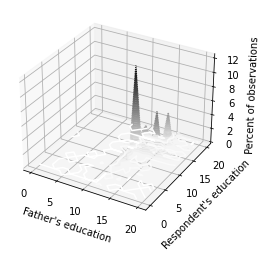

In [5]:
# default 
# here, we finally pass that threefold list of matrices to the graph syntax
# the graph syntax is weird, but that's something to be explained elsewhere
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(xs, ys, H, 50, cmap='binary')
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_zlabel('Percent of observations');

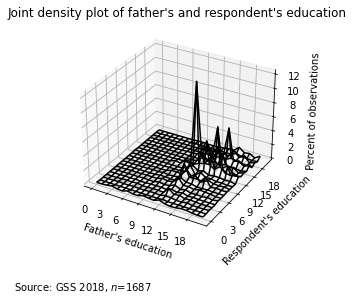

In [6]:
# wireplot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(xs, ys, H, color='black')
ax.set_title("Joint density plot of father's and respondent's education")
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_zlabel('Percent of observations')
ax.set_xticks(np.arange(0, 21, 3))
ax.set_yticks(np.arange(0, 21, 3))
plt.annotate('Source: GSS 2018, $\it{n}$=1687', (-.25,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('jointdensity.pdf', bbox_inches='tight');

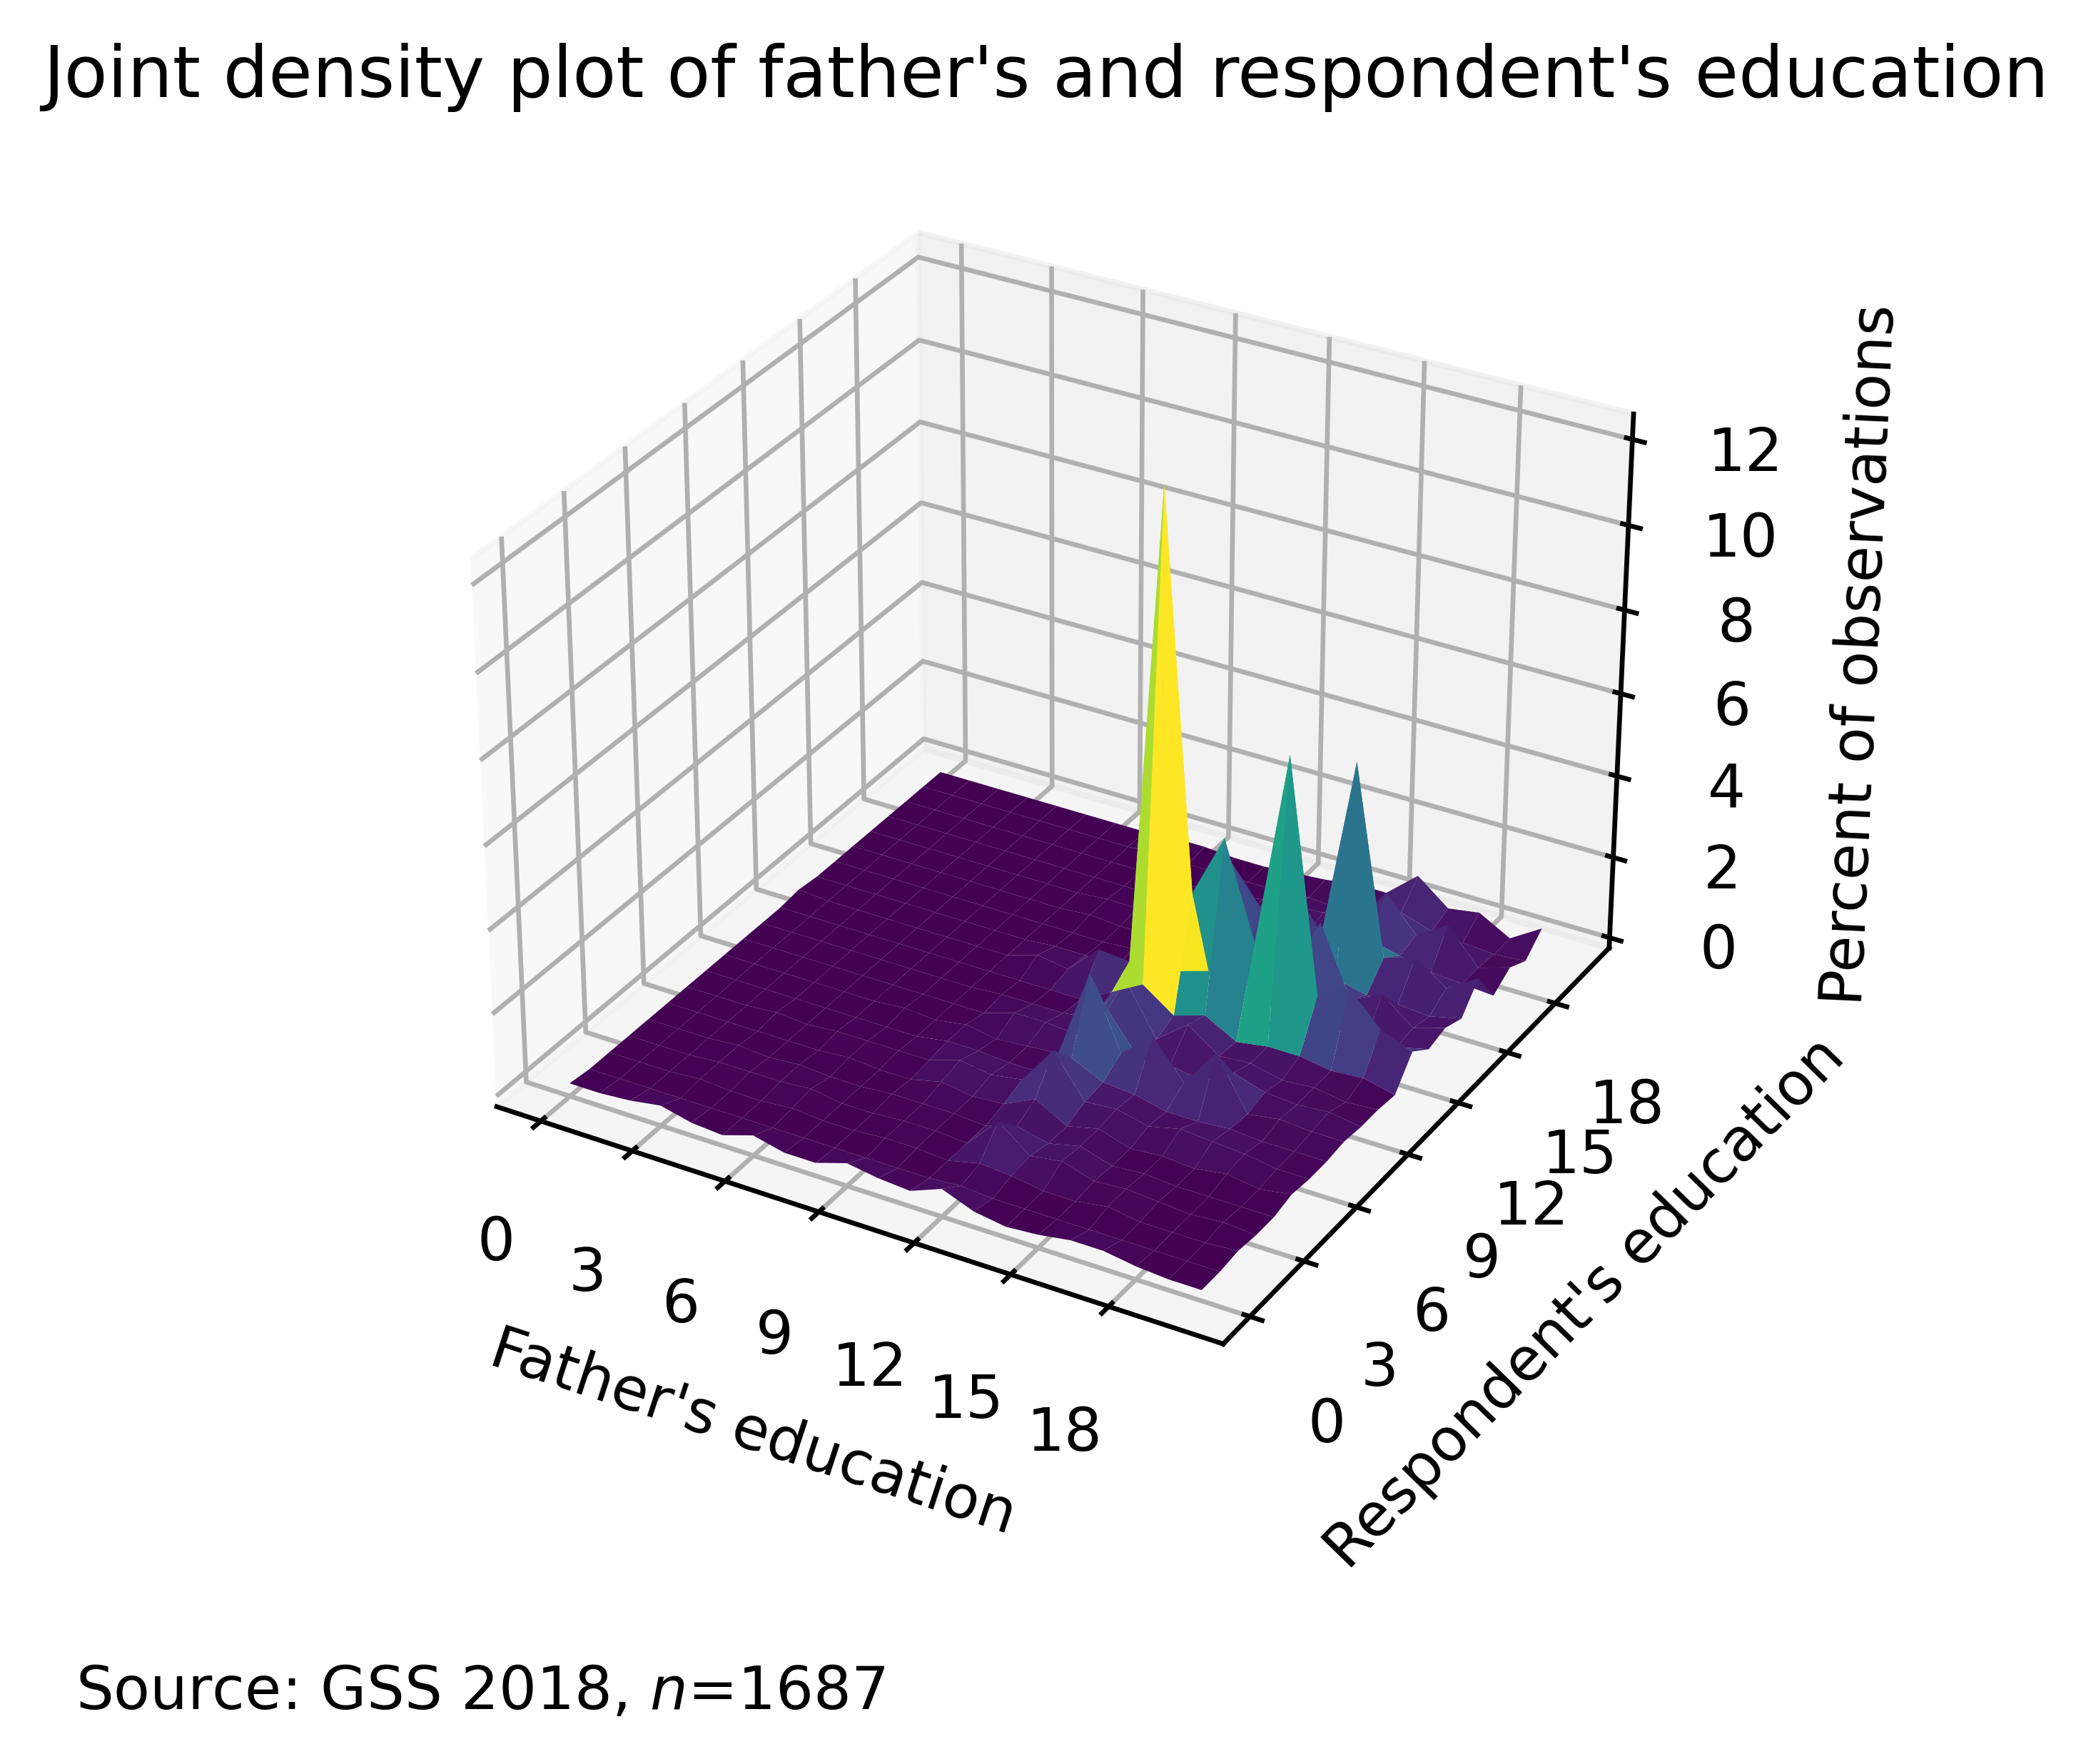

In [8]:
# add some color
fig = plt.figure(dpi=600)
ax = plt.axes(projection='3d')
ax.plot_surface(xs, ys, H, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
ax.set_title("Joint density plot of father's and respondent's education")
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_zlabel('Percent of observations')
ax.set_xticks(np.arange(0, 21, 3))
ax.set_yticks(np.arange(0, 21, 3))
plt.annotate('Source: GSS 2018, $\it{n}$=1687', (-.25,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('jointdensitycolor.pdf', bbox_inches='tight');